# Adult Income Exercise

For this exercise we will use a dataset that contains some features about people and we need to predict <b>if each person is payed more than 50.000 $ annualy or not</b>.

- You need to:
    - Explore the dataset
    - Give some basic information about the data
    - Preprocess the data (missing values, imputation...)
    - Test various Machine Learning algorithms
    - Evaluate the performance of these algorithms over the test data in terms of Accuracy, Precision, Recall, F1, plot the confusion matrix...
    - Chose one of these algorithms to perfom the task prediction and explain why (in comments or in a markdown cell)



# 0. Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, make_scorer
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

# 1. Reading data

### 1.1. Load the datase

In [59]:
# Read in the data
df = pd.read_csv('adult.csv')

### 1.2. Display the dataset

In [60]:
# fnlwgt is a weight variable that represents the demographic characteristics of each person surveyed.
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 1.3. Display basic information about the dataset

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 1.4. Display summary statistics


In [62]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# 2. Exploratory Data Analysis

### 2.1. Check for missing values

In [63]:
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


### 2.2. Distribution of the target variable

Plot the distribution of the target variable

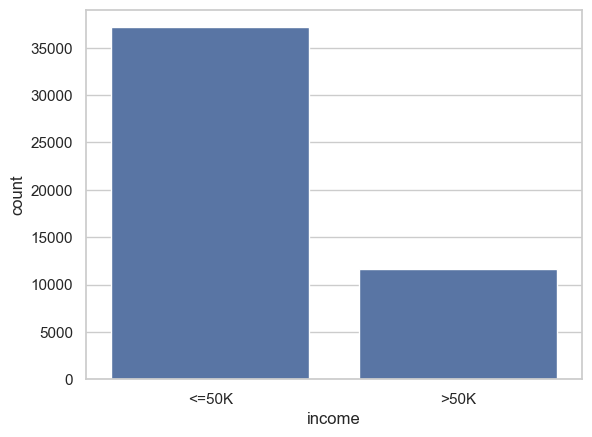

In [64]:
# Visualize the distribution of the target variable
sns.countplot(x='income', data=df)
plt.show()

### 2.3. Distribution of numerical variables

Plot the distribution of the numerical features.

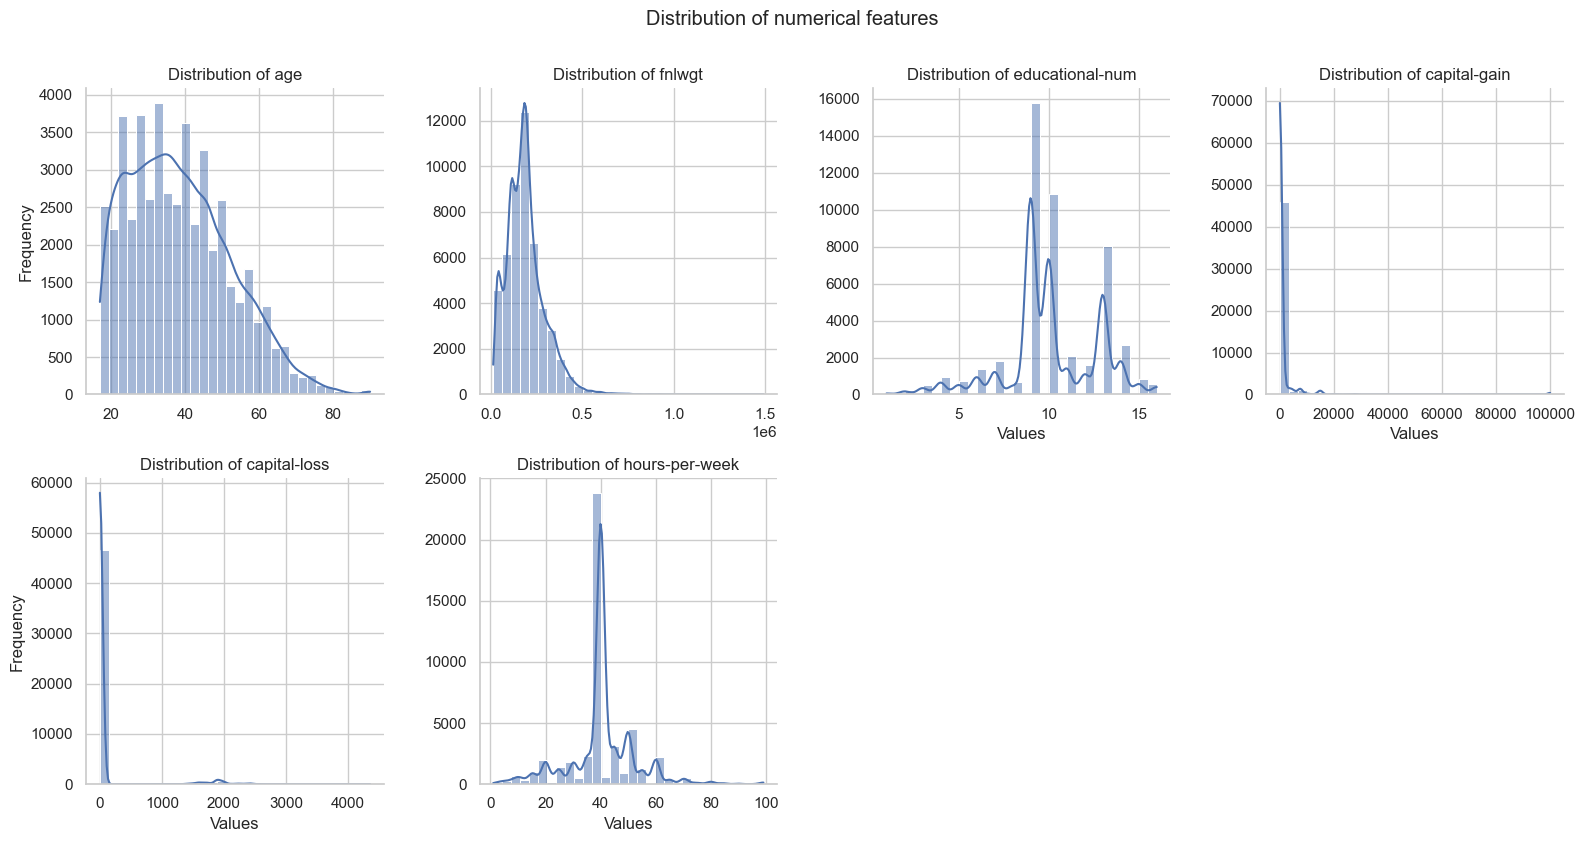

In [65]:
numerical_data = df.select_dtypes(include=np.number)

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a multi-grid plot for each numerical feature
grid = sns.FacetGrid(pd.melt(numerical_data), col="variable", col_wrap=4, sharex=False, sharey=False, height=4)
grid.map(sns.histplot, "value", bins=30, kde=True)
grid.set_titles("Distribution of {col_name}")
grid.set_axis_labels("Values", "Frequency")
plt.suptitle('Distribution of numerical features', y=1.05)
plt.show()

### 2.4. Histogram of catagorical variables

Plot the histogram of the catagorical features.

In [66]:
categorical_data = df.select_dtypes(exclude=np.number)
categorical_data

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


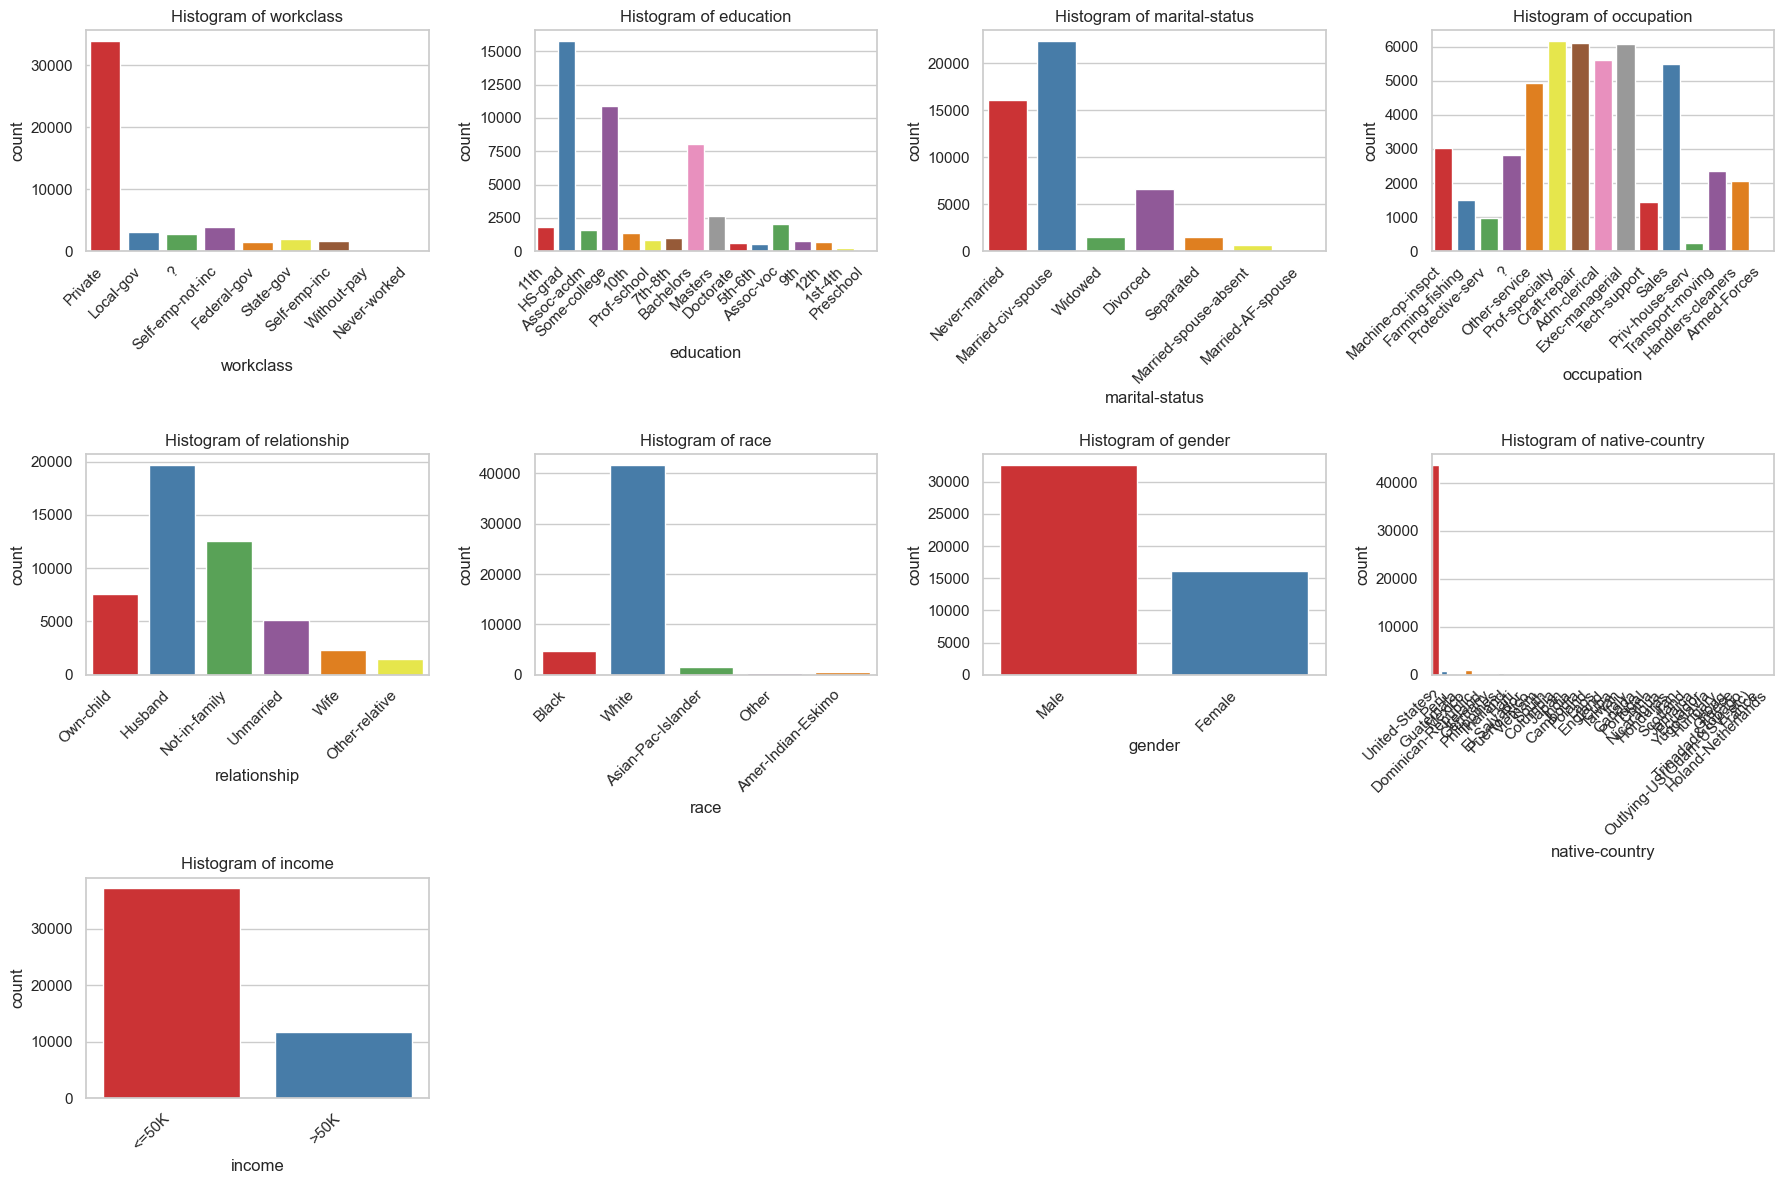

In [67]:
plt.figure(figsize=(18, 12))

# Use Seaborn's countplot to create the histogram of categorical features
for i, feature in enumerate(categorical_data, 1):
    plt.subplot(3, 4, i)
    
    # If the feature is 'model_key', limit the number of labels displayed or rotate them more.
    if feature == 'model_key':
        sns.countplot(x=feature, data=df, palette="Set1", order=df[feature].value_counts().index[:10])  # Example: display the first 20
    else:
        sns.countplot(x=feature, data=df, palette="Set1")
    
    plt.title(f'Histogram of {feature}')

    # Adjust label rotation in X
    plt.xticks(rotation=45, ha='right')  # We can adjust the rotation angle to suit your preferences
    
plt.tight_layout()
plt.show()

In [68]:
# # Set the style of seaborn for better aesthetics
# sns.set(style="whitegrid")

# # Create a multi-grid plot for each numerical feature
# grid = sns.FacetGrid(pd.melt(categorical_data), col="variable", col_wrap=4, sharex=False, sharey=False, height=4)
# grid.map(sns.histplot, "value", bins=30, kde=True)
# grid.set_titles("Distribution of {col_name}")
# grid.set_axis_labels("Values", "Frequency")
# plt.suptitle('Distribution of numerical features', y=1.05)
# plt.show()

# 3. Data Splitting

Split the dataset into 2 training and test datasets.

In [69]:
# Define characteristics (X) and target variable (y)
X = df.drop('income', axis=1)
y = df['income']

# Divide data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train are your training sets, and X_test and y_test are your test sets.

# 4. Feature Engineering

### 4.1. Scaling numerical variables

In [70]:
numerical_columns = numerical_data.columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])


In [71]:
X_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
37193,0.246123,Private,-0.421839,Some-college,-0.029836,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.144456,-0.219726,-0.034370,United-States
31093,0.974794,Self-emp-not-inc,-0.138604,10th,-1.585248,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.144456,-0.219726,-0.435727,United-States
33814,-0.336813,Local-gov,-0.161041,HS-grad,-0.418689,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.144456,-0.219726,-0.034370,United-States
14500,-0.774016,Private,-0.605742,HS-grad,-0.418689,Never-married,Adm-clerical,Not-in-family,White,Female,-0.144456,-0.219726,-0.034370,United-States
23399,0.537592,Private,-1.529544,Assoc-voc,0.359017,Never-married,Transport-moving,Not-in-family,White,Male,-0.144456,-0.219726,0.768345,United-States


### 4.2. Catagorical variables encoding

Convert catagorical columns into numerical columns using label encoding or one hot encoding.

In [72]:
non_numerical_columns = X_train.select_dtypes(exclude=np.number).columns.tolist()
print(non_numerical_columns)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [73]:
# For One-Hot Encoding
label_encoder = LabelEncoder()

for col in non_numerical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.fit_transform(X_test[col])


In [74]:
X_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
37193,0.246123,4,-0.421839,15,-0.029836,2,7,0,4,1,-0.144456,-0.219726,-0.034370,39
31093,0.974794,6,-0.138604,0,-1.585248,2,3,0,4,1,-0.144456,-0.219726,-0.435727,39
33814,-0.336813,2,-0.161041,11,-0.418689,2,3,0,4,1,-0.144456,-0.219726,-0.034370,39
14500,-0.774016,4,-0.605742,11,-0.418689,4,1,1,4,0,-0.144456,-0.219726,-0.034370,39
23399,0.537592,4,-1.529544,8,0.359017,4,14,1,4,1,-0.144456,-0.219726,0.768345,39


# 5. Logistic Regression

Fit a logistic regression model on the training set. Evaluate the model on the testing set. Use the F1score as an evaluation metric.

In [75]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

f1_micro = f1_score(y_test, y_pred1, average='micro')
f1_macro = f1_score(y_test, y_pred1, average='macro')
f1_weighted = f1_score(y_test, y_pred1, average='weighted')

# Print the F1 scores
print(f'F1 Micro: {f1_micro}')
print(f'F1 Macro: {f1_macro}')
print(f'F1 Weighted: {f1_weighted}')

F1 Micro: 0.8260825058859657
F1 Macro: 0.7178771359474069
F1 Weighted: 0.8106833615029742


# 6. Decision Tree

Fiting a decision tree model on the training set. 
Using cross-validation in order to tune the hyperparameters of the decision tree model.
And Evaluate the model on the testing set. 
Using the Macro F1score as an evaluation metric.

In [76]:
dt_model = DecisionTreeClassifier(random_state=42)

# Define a parameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use cross-validated grid search to find the best hyperparameters
macro_f1_scorer = make_scorer(f1_score, average='macro')
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring=macro_f1_scorer)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the model with the best hyperparameters on the entire training set
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

# Predict on the testing set
y_pred2 = best_dt_model.predict(X_test)

# Calculate Macro F1 score on the testing set
macro_f1_test = f1_score(y_test, y_pred2, average='macro')

# Display the best hyperparameters and Macro F1 score on the testing set
print(f'Best Hyperparameters: {best_params}')
print(f'Macro F1 Score on Testing Set: {macro_f1_test}')

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Macro F1 Score on Testing Set: 0.7861160065456141


Plot the decision tree.

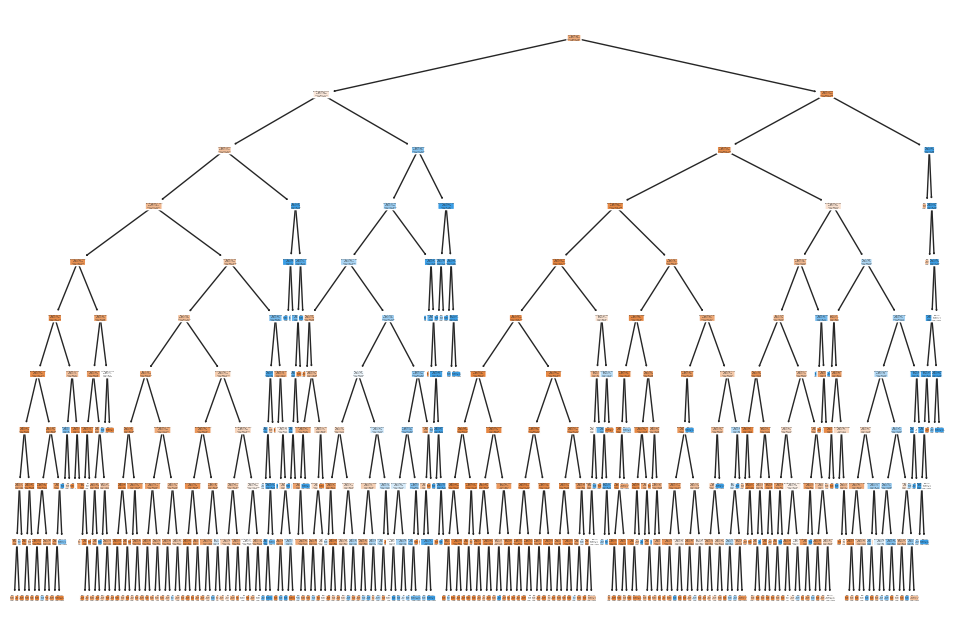

In [77]:
plt.figure(figsize=(12, 8))
plot_tree(best_dt_model, feature_names=X_train.columns.tolist(), class_names=y_train.tolist(), filled=True, rounded=True)
plt.show()

# 7. Random Forest

Fit a random forest model on the training set. 
Use cross-validation in order to tune the hyperparameters of the random forest model. Evaluate the model on the testing set. Use the Macro F1score as an evaluation metric.

In [78]:
rf_model = RandomForestClassifier(random_state=42)

# Define a parameter distribution to sample from
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use randomized search to find the best hyperparameters
macro_f1_scorer2 = make_scorer(f1_score, average='macro')
randomized_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring=macro_f1_scorer2, random_state=42)
randomized_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params2 = randomized_search.best_params_

# Fit the model with the best hyperparameters on the entire training set
best_rf_model = randomized_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred3 = best_rf_model.predict(X_test)

# Calculate Macro F1 score on the testing set
macro_f1_test2 = f1_score(y_test, y_pred3, average='macro')

# Display the best hyperparameters and Macro F1 score on the testing set
print(f'Best Hyperparameters: {best_params2}')
print(f'Macro F1 Score on Testing Set: {macro_f1_test2}')

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}
Macro F1 Score on Testing Set: 0.7975799542351558


Plot feature importance/weight.

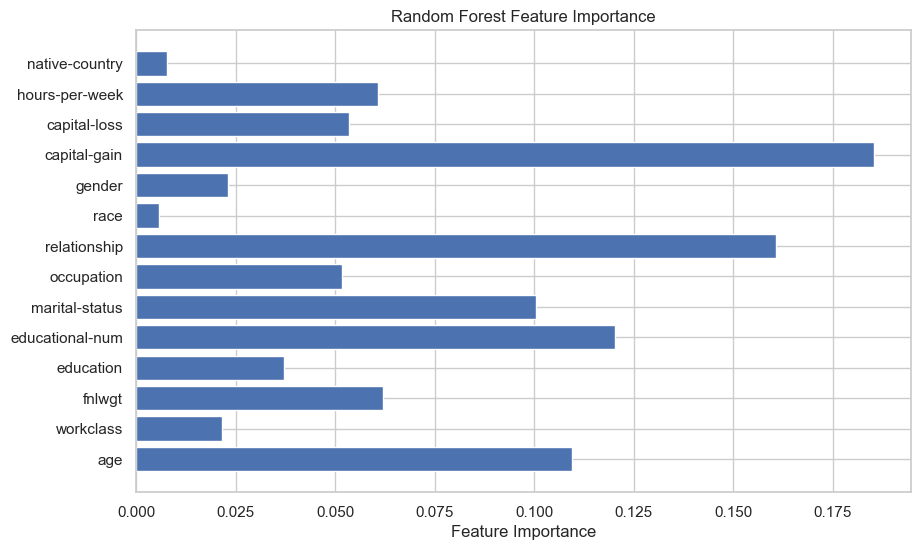

In [79]:
feature_importance = best_rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# 8. Gradient Boosting

Fit a gradient boosting model on the training set. Use cross-validation in order to tune the hyperparameters of the gradient boosting model. Evaluate the model on the testing set. Use the Macro F1score as an evaluation metric.

In [80]:
gb_model = GradientBoostingClassifier(random_state=42)

param_dist2 = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

macro_f1_scorer3 = make_scorer(f1_score, average='macro')
randomized_search2 = RandomizedSearchCV(gb_model, param_distributions=param_dist2, n_iter=10, cv=5, scoring=macro_f1_scorer3, random_state=42)
randomized_search2.fit(X_train, y_train)

# Get the best hyperparameters
best_params3 = randomized_search2.best_params_

# Fit the model with the best hyperparameters on the entire training set
best_gb_model = randomized_search2.best_estimator_
best_gb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred4 = best_gb_model.predict(X_test)

# Calculate Macro F1 score on the testing set
macro_f1_test3 = f1_score(y_test, y_pred4, average='macro')

# Display the best hyperparameters and Macro F1 score on the testing set
print(f'Best Hyperparameters: {best_params3}')
print(f'Macro F1 Score on Testing Set: {macro_f1_test3}')

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Macro F1 Score on Testing Set: 0.7791465964670211


Plot feature importance/weight.

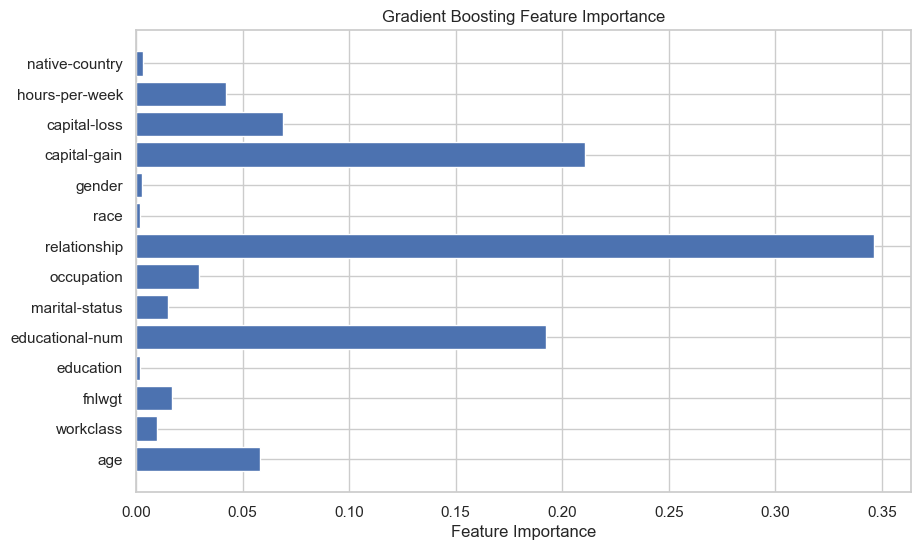

In [81]:
feature_importance = best_gb_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importance')
plt.show()

### Chose one of the algorithms and explain why

Your answer here:

The choice of a machine learning algorithm depends on various factors such as the nature of the data, the problem at hand, and the performance metrics.

Based on the evaluation results, we choose the algorithm with the best performance. Consider factors like F1 score.

In [82]:
print("LR :")
print(f'F1 Micro: {f1_micro}')
print(f'F1 Macro: {f1_macro}')
print(f'F1 Weighted: {f1_weighted}')
print("DT :")
print(f'Macro F1 Score on Testing Set: {macro_f1_test}')
print("RF :")
print(f'Macro F1 Score on Testing Set: {macro_f1_test2}')
print("GB :")
print(f'Macro F1 Score on Testing Set: {macro_f1_test3}')

LR :
F1 Micro: 0.8260825058859657
F1 Macro: 0.7178771359474069
F1 Weighted: 0.8106833615029742
DT :
Macro F1 Score on Testing Set: 0.7861160065456141
RF :
Macro F1 Score on Testing Set: 0.7975799542351558
GB :
Macro F1 Score on Testing Set: 0.7791465964670211


In our case, Random Forest provides the best F1 score (79.75%) among Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting

Random Forest is the preferred choice for our classification task due to its ensemble nature :

- **Ensemble Method**: It constructs multiple decision trees and combines their predictions,

- **Robust to Overfitting** : enhancing robustness and mitigating overfitting compared to individual trees.

- **Handling Non-linearity and Complex Relationships**: excels in capturing complex relationships and non-linear patterns in numerical and categorical data, demonstrating its versatility.


- **Interpretability**: While not as interpretable as a single decision tree, Random Forest provides valuable insights through feature importances, aiding in understanding influential features for predictions.

The choice of Random Forest is justified based on its ensemble nature, robustness, ability to handle non-linearity, and good performance in terms of F1 score for our specific task of predicting whether a person earns more or less than $50,000 annually.